In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")

In [70]:
df = pd.read_parquet('./data/df.parquet')

In [82]:
df.head()

,Tarih,ServisTipi,Hat,Sınıf,Fiyat,Satış,THY
0,2021-02-12 03:00:00,Ana Hat Bölgesel,İstanbul - Bakırköy,C,128.52,97,1310.40
1,2021-08-22 19:00:00,Ana Hat Bölgesel,Pendik - Bozöyük,C,70.31,286,3979.80
14,2021-01-13 09:00:00,Ana Hat Bölgesel,Pendik - Gebze,C,103.95,121,2341.35
3,2021-10-24 05:00:00,Ana Hat Bölgesel,Söğütlüçeşme - Eskişehir,C,147.61,89,1190.40
22,2021-07-11 07:00:00,YHT,Ankara - İstanbul,C,265.91,35,673.92


In [72]:
df.drop('Id', axis=1, inplace=True)

In [83]:
df.corr()

,Fiyat,Satış,THY
Fiyat,1.000000,-0.821192,-0.769885
Satış,-0.821192,1.000000,0.921920
THY,-0.769885,0.921920,1.000000


<AxesSubplot:>

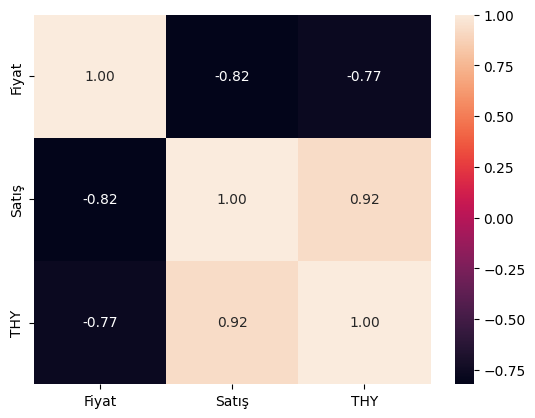

In [74]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [84]:
pps.score(df, 'Tarih', 'Satış')

{'x': 'Tarih',
 'y': 'Satış',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 79.1456,
 'model_score': 80.61691531746031,
 'model': DecisionTreeRegressor()}

In [79]:
pps.predictors(df, 'Satış')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,THY,Satış,0.627099,regression,True,mean absolute error,79.1456,29.513465,DecisionTreeRegressor()
1,Fiyat,Satış,0.607343,regression,True,mean absolute error,79.1456,31.077072,DecisionTreeRegressor()
2,Sınıf,Satış,0.180903,regression,True,mean absolute error,79.1456,64.827928,DecisionTreeRegressor()
3,Hat,Satış,0.166933,regression,True,mean absolute error,79.1456,65.933595,DecisionTreeRegressor()
4,ServisTipi,Satış,0.019470,regression,True,mean absolute error,79.1456,77.604628,DecisionTreeRegressor()
5,Tarih,Satış,0.000000,regression,True,mean absolute error,79.1456,80.616915,DecisionTreeRegressor()


In [77]:
pps.matrix(df).head()

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Tarih,Tarih,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,Tarih,ServisTipi,0.775524,classification,True,weighted F1,0.50280,0.888391,DecisionTreeClassifier()
2,Tarih,Hat,0.764538,classification,True,weighted F1,0.00720,0.766234,DecisionTreeClassifier()
3,Tarih,Sınıf,0.000000,classification,True,weighted F1,0.16660,0.035537,DecisionTreeClassifier()
4,Tarih,Fiyat,0.022899,regression,True,mean absolute error,38.53744,37.654974,DecisionTreeRegressor()


<AxesSubplot:xlabel='x', ylabel='y'>

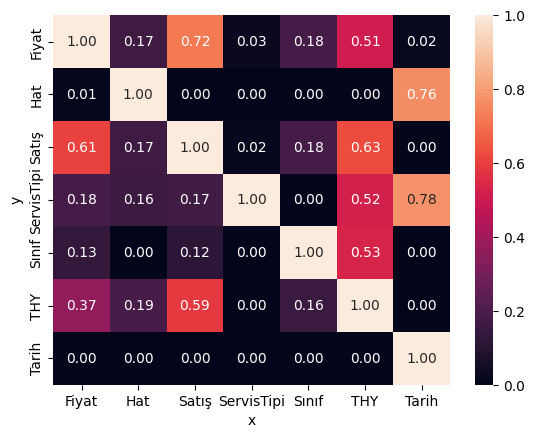

In [81]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f")